In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
from PIL import Image
import os
from sklearn.cross_validation import train_test_split
from skimage import exposure
import pimpy
#from pimpy.image import factory
from pimpy.image import Image as PIm
#import leargist
import sys,tempfile,getopt,logging,io
from io import StringIO
from subprocess import *
from pimpy.image.features.feature import Feature 
import sift
import csv
from leargist import leargist as gist

/home/natka/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


float32
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(2

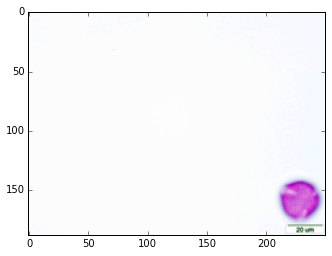

In [3]:
pollen1 = pickle.load( open( 'imgdatasethoney', 'rb' ) )
target1 = pickle.load( open( 'imgtargethoney', 'rb' ) )
nb_classes=target1[target1.shape[0]-1]+1
im1=Image.fromarray(pollen1[301], 'RGB')

pollen1=pollen1.astype(np.float32)
print(pollen1[1].dtype)
im1.save("tmp.ppm")
im=Image.open("tmp.ppm")
plt.imshow(im)
descriptors = gist.color_gist(im)
#print(descriptors)

GISTdescr=[]
i=0
#im1=Image.fromarray(pollen1[416], 'RGB')
#im1=im1.convert('L')
#im1=im1.crop((0, 0, im1.width, im1.height-9))
#im1.save("tmp1.pgm")

for f in range(pollen1.shape[0]): 
    #print(f)
    im1=Image.fromarray(pollen1[f], 'RGB')
    im1=im1.crop((0, 0, im1.width, im1.height - 9))
    im1.save("tmp.ppm")
    im=Image.open("tmp.ppm")
    d = gist.color_gist(im)
    
    d=np.append(d,int(target1[f]))
    GISTdescr.append(d)
cou=pollen1.shape[0]    
GISTdescr=np.array(GISTdescr)
with open('gistHONEY.csv','w',newline='') as csvfile:
    writer=csv.writer(csvfile,delimiter=' ')
    for f in range(cou):
        #writer.writerow(str(target1[f]))
        writer.writerow(GISTdescr[f])

dataset_dir = u"/home/natka/loc+segm"
cou=0
target1=[]
GISTdescr=[]
for d, dirs, files in os.walk(dataset_dir): 
 #print(d,dirs)
    images = filter(lambda x: x.endswith('.jpg'), files)     
    for f in images:
        path = os.path.join(d,f) # формирование адреса 
        img = Image.open(path)
        im1=img.resize((250,250),Image.ANTIALIAS)
        print(im1.size)
        im1.save("tmp.ppm")
        im=Image.open("tmp.ppm")
        target1.append(f[6])
        descr = gist.color_gist(im)
        descr=np.append(descr,f[6])
        GISTdescr.append(descr)
        cou+=1
        
        

GISTdescr=np.array(GISTdescr)
#надо 200 фичей

with open('gistLOCALsquareHONEY.csv','w',newline='') as csvfile:
    writer=csv.writer(csvfile,delimiter=' ')
    for f in range(cou):
        #writer.writerow(str(target1[f]))
        writer.writerow(GISTdescr[f])
